In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session 

/kaggle/input/flamingopic/Flamingo.jpg
/kaggle/input/interesting-facts-about-flamingo/Picture.jpg


**According to Amit Ray, "Deep learning with deep imagination is the road map to AI Springs & AI autumns "**

**DEEP LEARNING:**

* Deep learning is a class of machine learning algorithms that uses multiple layers to progressively extract higher-level features from the raw input. 

* For example, in image processing, lower layers may identify edges, while higher layers may identify the concepts relevant to a human such as digits or letters or faces.

* In Deep Learning, Data Augmentation is a very common technique to improve the results and overfitting.

**DATA AUGMENTATION:**

* Data Augmentation is a technique in Deep Learning which helps in adding value to our base dataset by adding the gathered information from various sources to improve the quality of data of an organisation.

* Data Augmentation is one of the most important processes that makes the data very much informational.

* We can augment:

     * Image
     * Text
     * Audio
     * Any other types of data
     



**IMAGE AUGMENTATION:**

* Image augmentation is a technique of altering the existing data to create some more data for the model training process. In other words, it is the process of artificially expanding the available dataset for training a deep learning model.

* In this notebook, we will focus on some manual image augmentation & manipulation using Tensorflow.

**IMPORTING LIBRARIES:**

In [2]:
import urllib

import numpy as np 
import pandas as pd 

from skimage.transform import rotate
from tqdm import tqdm
from skimage.transform import rotate, AffineTransform, warp
from skimage.util import random_noise
from skimage.filters import gaussian

import PIL.Image

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 5)

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers
AUTOTUNE = tf.data.experimental.AUTOTUNE

!pip install git+https://github.com/tensorflow/docs

import tensorflow_docs as tfdocs
import tensorflow_docs.plots

import tensorflow_datasets as tfds

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-kh9ajn0j
  Running command git clone --filter=blob:none -q https://github.com/tensorflow/docs /tmp/pip-req-build-kh9ajn0j
  Resolved https://github.com/tensorflow/docs to commit 4be05178be80b4a0e41042186bdab3b263895a8a
  Preparing metadata (setup.py) ... - done
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0.dev0-py3-none-any.whl size=179811 sha256=5f069f264db6024f55d869069a93e35691aff37074be18da411d85d54e315a83
  Stored in directory: /tmp/pip-ephem-wheel-cache-i6fs0nq5/wheels/cc/c4/d8/5341e93b6376c5c929c49469fce21155eb69cef1a4da4ce32c
Successfully built tensorflow-docs


**LOAD THE IMAGE:**

In [3]:
image_path = tf.keras.utils.load_img("/kaggle/input/flamingopic/Flamingo.jpg")


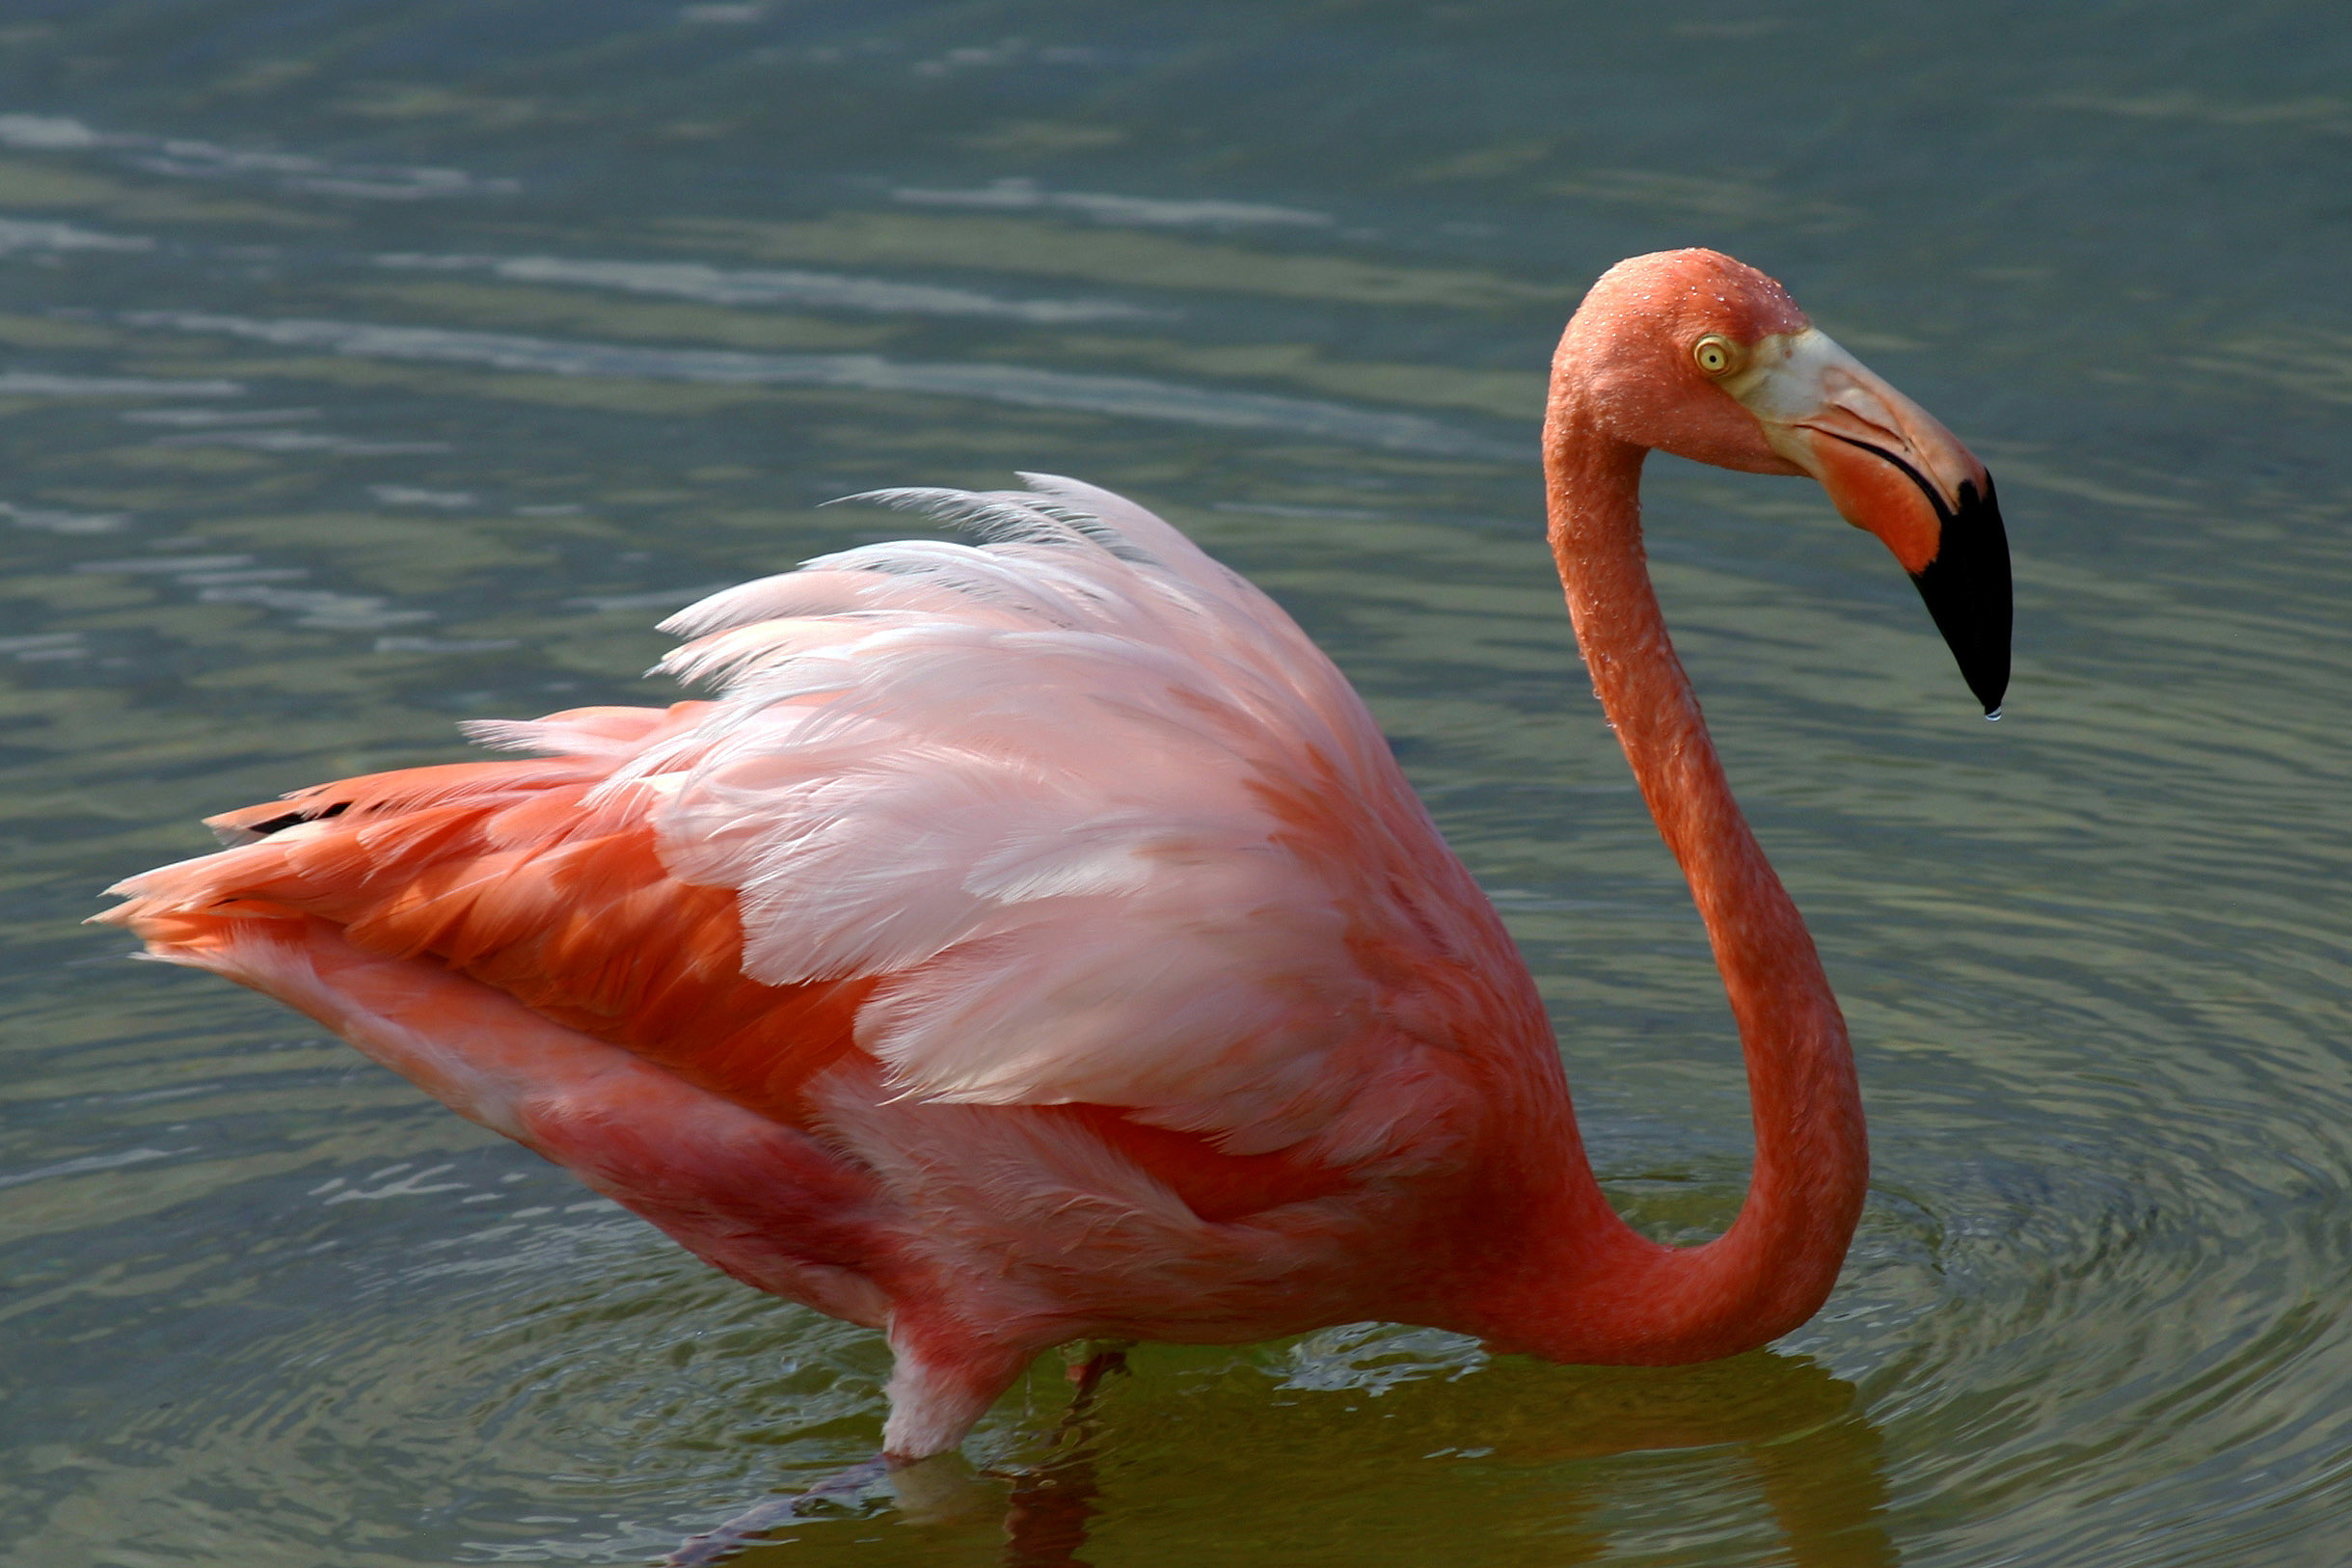

In [4]:
image_path

In [5]:
tf_image = np.array(image_path)

**CREATION OF A FUNCTION TO VISUALIZE THE COMPARISON BETWEEN THE ORIGINAL IMAGE AND THE AUGMENTED IMAGE:**

In [6]:
def visualize(original, augmented):
  fig = plt.figure()
  plt.subplot(1,2,1)
  plt.title('Original image')
  plt.imshow(original)

  plt.subplot(1,2,2)
  plt.title('Augmented image')
  plt.imshow(augmented)

**ROTATING THE IMAGE:**

* One of the most commonly used augmentation techniques is image rotation.

* Even if we rotate the image, the information on the image remains the same. 

* A flamingo is a flamingo, even if we see it from a different angle.

2022-04-29 12:04:27.724688: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


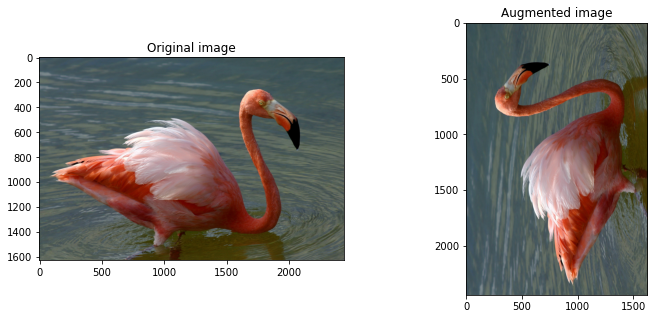

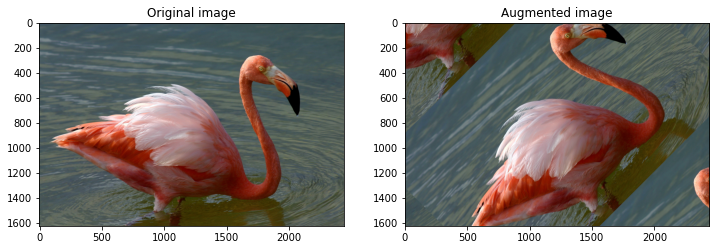

In [7]:
#Rotating the image to 90 degree angle
rotated_image = tf.image.rot90(tf_image)
visualize(tf_image, rotated_image)

#Rotating the image to 45 degree angle
rotated = rotate(tf_image, angle=45, mode = 'wrap')
visualize(tf_image, rotated)

**FLIPPING THE IMAGE:**

* Flipping can be considered as an extension of rotation.

* It allows us to flip the image in the Left-Right direction as well as the Up-Down direction.

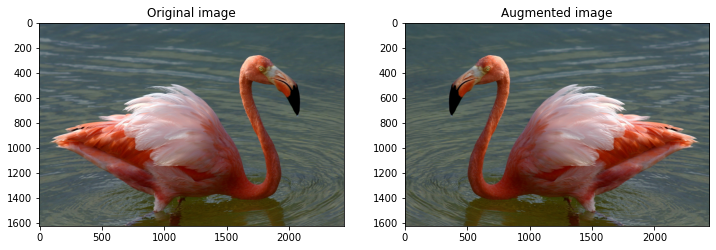

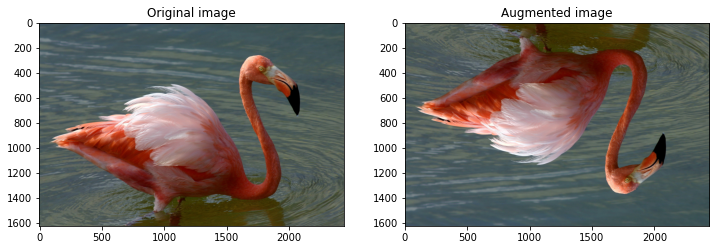

In [8]:
#flip the image in the Left-Right direction
flipped_image_left_right = tf.image.flip_left_right(tf_image)
visualize(tf_image, flipped_image_left_right)

#flip the image in the Up-Down direction
flipped_image_up_down = tf.image.flip_up_down(tf_image)
visualize(tf_image, flipped_image_up_down)

**APPLYING THE GRAYSCALE FEATURES TO THE IMAGE:**

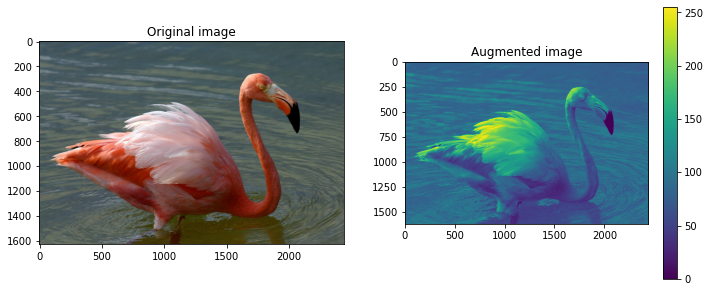

In [9]:
grayscaled_image = tf.image.rgb_to_grayscale(tf_image)
visualize(tf_image, tf.squeeze(grayscaled_image))
plt.colorbar()

**ADDING THE SATURATION FACTOR TO THE IMAGE:**

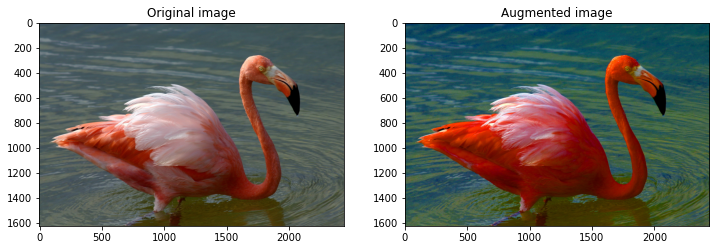

In [10]:
saturated_image = tf.image.adjust_saturation(tf_image, 3)
visualize(tf_image, saturated_image)

**CHANGING THE BRIGHTNESS LEVELS OF THE IMAGE:**

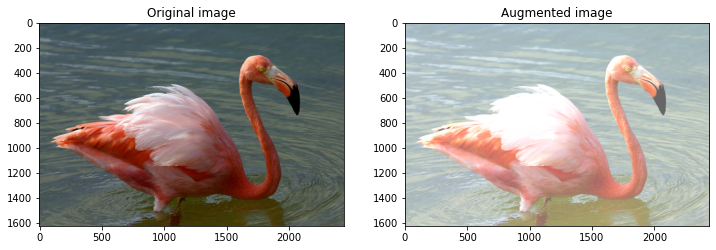

In [11]:
bright_image = tf.image.adjust_brightness(tf_image, 0.4)
visualize(tf_image, bright_image)

**CROPPING THE IMAGE:**

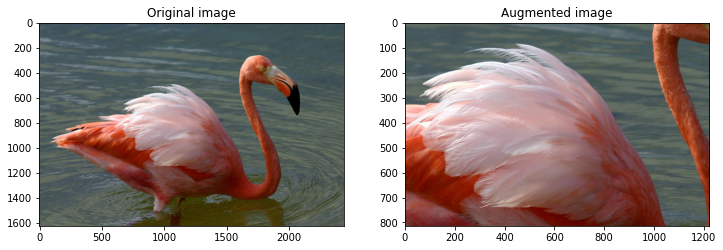

In [12]:
cropped_image = tf.image.central_crop(tf_image, central_fraction=0.5)
visualize(tf_image,cropped_image)

**SHIFTING THE IMAGE:**

* By shifting the images, we can change the position of the objects in the image and hence give more variety to the model. 

* Shifting the image eventually can result in a more generalized model.
    

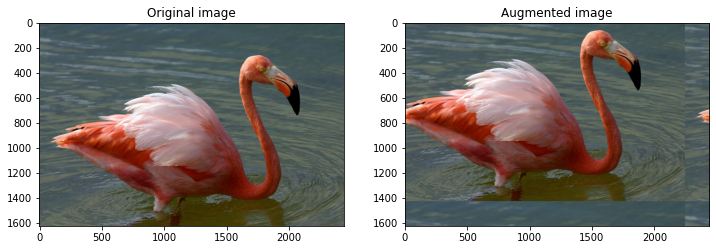

In [13]:
#apply shift operation
transform = AffineTransform(translation=(200,200))
wrapShift = warp(tf_image,transform,mode='wrap')
visualize(tf_image,wrapShift)

**IMAGE NOISING:**

* Another popularly used image augmentation technique is, Image Noising where we add noise to the image.

* This technique allows our model to learn how to separate the signal from the noise in the image. 

* This also makes our model more robust to changes in the image



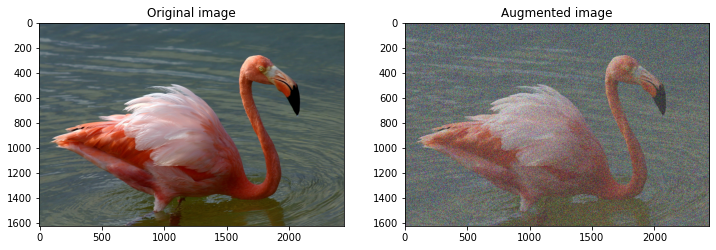

In [14]:
#standard deviation for noise to be added in the image
sigma=0.155
#add random noise to the image
noisyRandom = random_noise(tf_image,var=sigma**0.5)
visualize(tf_image,noisyRandom)

**APPLYING THE DATA AUGMENTATION FEATURES ON A DATASET:**

In [15]:
dataset, info =  tfds.load('mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

num_train_examples= info.splits['train'].num_examples

2022-04-29 12:04:53.293195: W tensorflow/core/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "Not found: Could not locate the credentials file.". Retrieving token from GCE failed with "Failed precondition: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata".


Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [16]:
def convert(tf_image, label):
  tf_image = tf.image.convert_image_dtype(tf_image, tf.float32) # Cast and normalize the image to [0,1]
  return tf_image, label

def augment(tf_image,label):
  tf_image,label = convert(tf_image, label)
  tf_image = tf.image.convert_image_dtype(tf_image, tf.float32) # Cast and normalize the image to [0,1]
  tf_image = tf.image.resize_with_crop_or_pad(tf_image, 34, 34) # Add 6 pixels of padding
  tf_image = tf.image.random_crop(tf_image, size=[28, 28, 1]) # Random crop back to 28x28
  tf_image = tf.image.random_brightness(tf_image, max_delta=0.5) # Random brightness

  return tf_image,label
BATCH_SIZE = 64
# Only use a subset of the data so it's easier to overfit, for this tutorial
NUM_EXAMPLES = 2048

**CREATION OF A AUGMENTED DATASET:**

In [17]:
augmented_train_batches = (
    train_dataset
    # Only train on a subset, so you can quickly see the effect.
    .take(NUM_EXAMPLES)
    .cache()
    .shuffle(num_train_examples//4)
    # The augmentation is added here.
    .map(augment, num_parallel_calls=AUTOTUNE)
    .batch(BATCH_SIZE)
    .prefetch(AUTOTUNE)
) 

**CREATION OF A NON-AUGMENTED DATASET TO DRAW COMPARISONS:**

In [18]:
non_augmented_train_batches = (
    train_dataset
    # Only train on a subset, so you can quickly see the effect.
    .take(NUM_EXAMPLES)
    .cache()
    .shuffle(num_train_examples//4)
    # No augmentation.
    .map(convert, num_parallel_calls=AUTOTUNE)
    .batch(BATCH_SIZE)
    .prefetch(AUTOTUNE)
) 

**SETTING UP A VALIDATION SET:**

In [19]:
validation_batches = (
    test_dataset
    .map(convert, num_parallel_calls=AUTOTUNE)
    .batch(2*BATCH_SIZE)
)

**CREATE AND COMPILE A FULLY CONNECTED NEURAL NETWORKS MODEL WITH TWO LAYERS:**

In [20]:
def make_model():
  model = tf.keras.Sequential([
      layers.Flatten(input_shape=(28, 28, 1)),
      layers.Dense(4096, activation='relu'),
      layers.Dense(4096, activation='relu'),
      layers.Dense(10)
  ])
  model.compile(optimizer = 'adam',
                loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
  return model

**TRAIN THE MODEL WITHOUT DATA AUGMENTATION:**

In [21]:
model_without_aug = make_model()

no_aug_history = model_without_aug.fit(non_augmented_train_batches, epochs=50, validation_data=validation_batches)

2022-04-29 12:05:05.137096: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
 1/32 [..............................] - ETA: 26s - loss: 2.2925 - accuracy: 0.1406

2022-04-29 12:05:05.855010: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


32/32 [==============================] - 10s 300ms/step - loss: 0.7512 - accuracy: 0.7578 - val_loss: 0.3929 - val_accuracy: 0.8851
Epoch 2/50
32/32 [==============================] - 9s 275ms/step - loss: 0.1784 - accuracy: 0.9482 - val_loss: 0.2951 - val_accuracy: 0.9175
Epoch 3/50
32/32 [==============================] - 9s 273ms/step - loss: 0.0807 - accuracy: 0.9741 - val_loss: 0.3034 - val_accuracy: 0.9254
Epoch 4/50
32/32 [==============================] - 9s 295ms/step - loss: 0.0479 - accuracy: 0.9858 - val_loss: 0.3709 - val_accuracy: 0.9124
Epoch 5/50
32/32 [==============================] - 8s 270ms/step - loss: 0.0608 - accuracy: 0.9790 - val_loss: 0.3682 - val_accuracy: 0.9162
Epoch 6/50
32/32 [==============================] - 9s 277ms/step - loss: 0.0394 - accuracy: 0.9868 - val_loss: 0.3640 - val_accuracy: 0.9228
Epoch 7/50
32/32 [==============================] - 9s 275ms/step - loss: 0.0417 - accuracy: 0.9863 - val_loss: 0.3637 - val_accuracy: 0.9206
Epoch 8/50
32/32

**TRAIN THE MODEL WITH DATA AUGMENTATION:**

In [22]:
model_with_aug = make_model()

aug_history = model_with_aug.fit(augmented_train_batches, epochs=50, validation_data=validation_batches)

Epoch 1/50
 1/32 [..............................] - ETA: 24s - loss: 2.3130 - accuracy: 0.1562

2022-04-29 12:12:33.897549: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


32/32 [==============================] - 9s 277ms/step - loss: 2.3200 - accuracy: 0.3330 - val_loss: 1.0925 - val_accuracy: 0.7264
Epoch 2/50
32/32 [==============================] - 9s 292ms/step - loss: 1.3625 - accuracy: 0.5332 - val_loss: 0.7291 - val_accuracy: 0.8085
Epoch 3/50
32/32 [==============================] - 9s 273ms/step - loss: 0.9367 - accuracy: 0.6846 - val_loss: 0.5581 - val_accuracy: 0.8250
Epoch 4/50
32/32 [==============================] - 9s 289ms/step - loss: 0.8047 - accuracy: 0.7388 - val_loss: 0.4091 - val_accuracy: 0.8880
Epoch 5/50
32/32 [==============================] - 8s 270ms/step - loss: 0.6294 - accuracy: 0.7988 - val_loss: 0.3246 - val_accuracy: 0.9069
Epoch 6/50
32/32 [==============================] - 9s 291ms/step - loss: 0.6161 - accuracy: 0.7974 - val_loss: 0.3001 - val_accuracy: 0.9147
Epoch 7/50
32/32 [==============================] - 9s 277ms/step - loss: 0.5693 - accuracy: 0.8198 - val_loss: 0.2918 - val_accuracy: 0.9068
Epoch 8/50
32/32 

(0.75, 1.0)

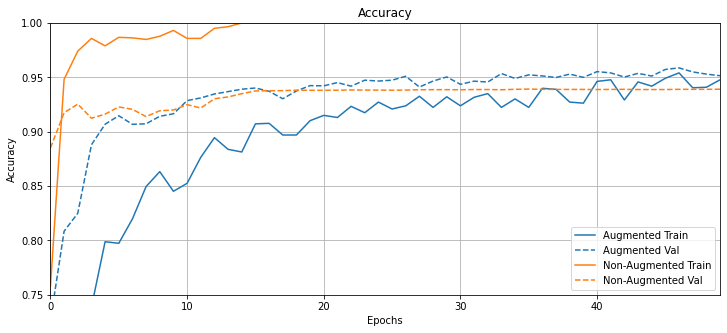

In [23]:
plotter = tfdocs.plots.HistoryPlotter()
plotter.plot({"Augmented": aug_history, "Non-Augmented": no_aug_history}, metric = "accuracy")
plt.title("Accuracy")
plt.ylim([0.75,1])

**INFERENCE:**

* In this notebook, we can observe that our Augmented model produced the accuracy of 95 percent on the validation set, which is slightly higher than the accuracy of non-augmented model which is 94 percent.


* With respect to the loss, the non-augmented model is overfitting the dataset. Whereas the Augmented model, is fitting and training on the dataset very well.

**INTERESTING FACTS:**

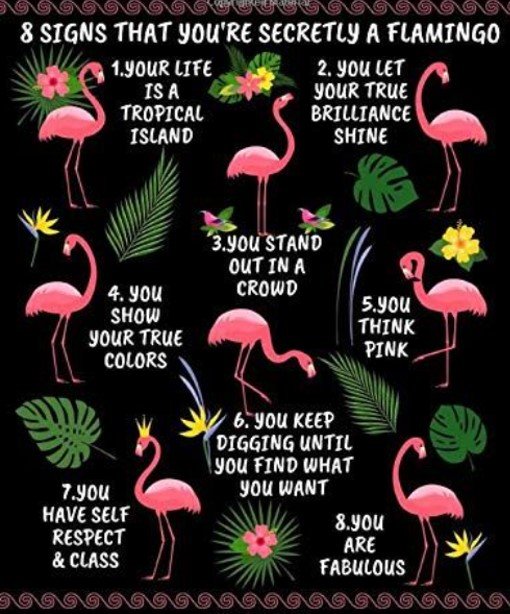

In [24]:
from IPython.display import Image
import os

Image('/kaggle/input/interesting-facts-about-flamingo/Picture.jpg')

**CONCLUSION:**

**According to Vaclav Smil, " Collaboration & augmentation are the foundational principles of innovation "**

Hence from this notebook, it is important to note that if you are aiming to develop a robust and generalized deep learning model but do not have a large dataset use your creativity & innovation. In such cases, image augmentation techniques come as a saviour, as they allow you to generate a wide range of new data.